In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# load dataset
dataset = load_wine()

# preprocessing (normalization)
scaler = StandardScaler()
scaler.fit(dataset.data)
data = scaler.transform(dataset.data)

Text(0,0.5,'2nd eigenvector')

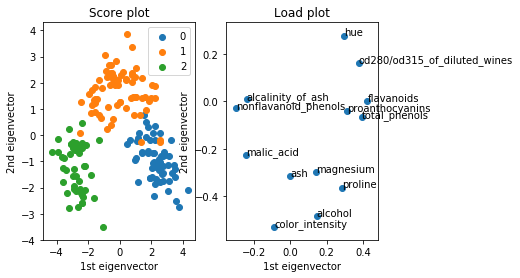

In [15]:
# exploratory analysis using PCA
pca = PCA()
pca.fit(data)
y = pca.transform(data)

fig, (ax1, ax2) = plt.subplots(1,2)
for ii in range(3):
    ax1.scatter(y[dataset.target == ii,0], y[dataset.target == ii,1], label=ii)

ax1.legend()
ax1.set_title("Score plot")
ax1.set_xlabel("1st eigenvector")
ax1.set_ylabel("2nd eigenvector")

# loadings
I = np.identity(dataset.data.shape[1]);
YI = pca.transform(I)
x_ = YI[:,0]
#y_ = np.zeros_like(y[:,0])
y_ = YI[:,1]

ax2.scatter(x_, y_)
for ii in range(len(dataset.feature_names)):
    ax2.text(x_[ii], y_[ii], dataset.feature_names[ii])

ax2.set_title("Load plot")
ax2.set_xlabel("1st eigenvector")
ax2.set_ylabel("2nd eigenvector")


<Container object of 13 artists>

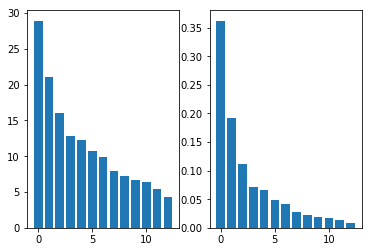

In [16]:
# Eigenspectrum
fig = plt.figure()
ax1, ax2 = fig.subplots(1,2)
ax1.bar(range(0,dataset.data.shape[1]), pca.singular_values_)
ax2.bar(range(0,dataset.data.shape[1]), pca.explained_variance_ratio_)